In [1683]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Carregue os dados com pandas.read_csv() e imprima as primeiras linhas.

In [1684]:
df = pd.read_csv("dados_abertos_itbi_transacoes_imobiliarias.csv", encoding="latin1", sep=";", on_bad_lines="skip")

df.head()

,VERSAO,ID_AVALIACAO,INSCRICAO_IMOVEL,NUM_DTI,EXERCICIO,DATA_CADASTRAMENTO_GI_IMOVEL,TIPO_TRANSMITENTE,TIPO_ADQUIRENTE,NUMERO_CEP,BAIRRO,LOGRADOURO,NUMERO,XSIRGAS2000,YSIRGAS2000,QTD_FRENTES,FRACAO_IDEAL,AREA_TERRENO,AREA_EDIFICADA,DATA_CONSTRUCAO,NUMERO_PAVIMENTOS,TIPO_USO_IMOVEL,PADRAO_CONSTRUCAO,TIPO_TERRENO,ANO_MES_DEBITO,NOME_ZONEAMENTO,ZONA_CARTORIO,DATA_DA_TRANSACAO_ITBI,ID_IMOVEL,CARTOGRAFIA,VL_BASE_CALCULO,VL_VENAL,VL_LANCAMENTO_IPTU,IND_COMPRA_VIA_PROGRAMA_HABITACIONAL
0,1,1146742.0,847606,1852/2025,2025,29/01/2025 09:38:03,Fisica,Juridica,60135270.0,ALDEOTA,R VICENTE LINHARES,521.0,"555541,738346802","9586375,70713781",2,"0,00233496","3716,83","66,86",03/09/2015 00:00:00,29.0,Comercial,Luxo 1,NaN,2025/JANEIRO,ZONA DE OCUPAÇÃO CONSOLIDADA,4ª Zona,NaN,2077457,18-95-100,310000,"96347,83","920,13",Nenhum
1,1,1146744.0,658735,1855/2025,2025,29/01/2025 09:52:42,Fisica,Fisica,60714170.0,ITAPERI,R ANTONIO BANDEIRA,120.0,"548340,2714658607","9581751,819940725",1,"0,05286228","1312,5","76,58",20/12/2004 00:00:00,4.0,Residencial,Alto nivel 1,NaN,2025/JANEIRO,ZONA DE REQUALIFICAÇÃO URBANA 1,6ª Zona,NaN,1735542,41-51-313,191900,"44641,48","268,96",Nenhum
2,1,1146855.0,604294,1967/2025,2025,30/01/2025 11:32:39,Fisica,Juridica,60125035.0,ALDEOTA,R NUNES VALENTE,922.0,"555227,8461445944","9587443,206337608",1,"0,08748056",111,"22,5",30/01/2003 00:00:00,2.0,Comercial,Alto nivel 1,NaN,2025/JANEIRO,ZONA DE OCUPAÇÃO CONSOLIDADA,4ª Zona,NaN,1978011,9-22-395,119140,"20157,29","192,5",Nenhum
3,1,1150465.0,75527,5687/2025,2025,24/03/2025 09:11:39,Juridica,Juridica,60030100.0,CENTRO,R SAO PAULO,687.0,"551976,017240403","9588276,42940138",1,"0,02603752",528,"31,74",01/01/1961 00:00:00,3.0,Residencial,Alto nivel 2,NaN,2025/MARCO,ZONA DE OCUPAÇÃO PREFERENCIAL 1,3ª Zona,NaN,1336635,2-20-274,54850,"22033,49","122,08",Nenhum
4,1,1144867.0,698740,47/2025,2025,02/01/2025 14:26:29,Fisica,Fisica,60191335.0,MANUEL DIAS BRANCO,R ZUCA ACCIOLY,1001.0,"559134,910131555","9585073,60152622",1,"0,0169199","4898,67","89,91",08/08/2011 00:00:00,2.0,Residencial,Alto nivel 3,NaN,2025/JANEIRO,ZONA DE INTERESSE AMBIENTAL DO COCO,5ª Zona,NaN,1989622,55-73-566,355000,"117242,74","687,37",Sistema Financeiro de Habitação


2. Quantas entradas(linhas) e variáveis (colunas) o dataset possui?

Resposta: O dataset possui 30101 linhas e 33 colunas.

In [1685]:
df.shape

(30101, 33)

3. Quais são os tipos de dados(dtypes) de cada coluna? Alguma precisa ser convertida para datetime ou numeric?

Resposta: 
#### Tipos de dados que precisam ser convertidos para DATE TIME
- DATA_CADASTRAMENTO_GI_IMOVEL
- DATA_CONSTRUCAO
- DATA_DA_TRANSACAO_ITBI

#### Tipos de dados que precisam ser convertidos para NUMERIC
- AREA_TERRENO
- AREA_EDIFICADA
- VL_VENAL
- VL_BASE_CALCULO
- XSIRGAS2000
- YSIRGAS2000
- VL_LANCAMENTO_IPTU
- FRACAO_IDEAL

In [1686]:
df.dtypes

VERSAO                                    int64
ID_AVALIACAO                            float64
INSCRICAO_IMOVEL                          int64
NUM_DTI                                  object
EXERCICIO                                 int64
DATA_CADASTRAMENTO_GI_IMOVEL             object
TIPO_TRANSMITENTE                        object
TIPO_ADQUIRENTE                          object
NUMERO_CEP                              float64
BAIRRO                                   object
LOGRADOURO                               object
NUMERO                                  float64
XSIRGAS2000                              object
YSIRGAS2000                              object
QTD_FRENTES                               int64
FRACAO_IDEAL                             object
AREA_TERRENO                             object
AREA_EDIFICADA                           object
DATA_CONSTRUCAO                          object
NUMERO_PAVIMENTOS                       float64
TIPO_USO_IMOVEL                         

In [1687]:
cols_to_datetime = [
    "DATA_CADASTRAMENTO_GI_IMOVEL",
    "DATA_CONSTRUCAO",
    "DATA_DA_TRANSACAO_ITBI"
]

In [1688]:
df[cols_to_datetime] = df[cols_to_datetime].apply(
    lambda col: col.astype(str).str.strip().str.replace(r"\s+", " ", regex=True)
)

for c in cols_to_datetime:
    df[c] = pd.to_datetime(df[c], errors="coerce", dayfirst=True)


In [1689]:
cols_to_numeric = [
    "AREA_TERRENO",
    "AREA_EDIFICADA",
    "VL_VENAL",
    "VL_BASE_CALCULO",
    "XSIRGAS2000",
    "YSIRGAS2000",
    "VL_LANCAMENTO_IPTU",
    "FRACAO_IDEAL"
]

In [1690]:
df[cols_to_numeric] = (
    df[cols_to_numeric]
    .apply(lambda col: col.str.replace(",", ".", regex=True).str.strip())
    .apply(pd.to_numeric, errors="coerce")
)

4. Existem valores ausentes? Em quais colunas?

Resposta: Sim, nas seguintes colunas:
- ID_AVALIACAO
- NUMERO
- LOGRADOURO
- NUMERO_CEP
- AREA_EDIFICADA
- DATA_CONSTRUCAO
- NUMERO_PAVIMENTOS
- PADRAO_CONSTRUCAO
- TIPO_TERRENO
- NOME_ZONEAMENTO
- DATA_DA_TRANSICAO_ITBI
- VL_BASE_CALCULO
- VL_LANCAMENTO_IPTU

In [1691]:
df.isnull().sum()

VERSAO                                      0
ID_AVALIACAO                             2169
INSCRICAO_IMOVEL                            0
NUM_DTI                                     0
EXERCICIO                                   0
DATA_CADASTRAMENTO_GI_IMOVEL                0
TIPO_TRANSMITENTE                           0
TIPO_ADQUIRENTE                             0
NUMERO_CEP                                  1
BAIRRO                                      0
LOGRADOURO                                  1
NUMERO                                   1670
XSIRGAS2000                                 1
YSIRGAS2000                                 1
QTD_FRENTES                                 0
FRACAO_IDEAL                                0
AREA_TERRENO                                0
AREA_EDIFICADA                            746
DATA_CONSTRUCAO                          4987
NUMERO_PAVIMENTOS                        4878
TIPO_USO_IMOVEL                             0
PADRAO_CONSTRUCAO                 

5. Quais colunas parecem ser identificadores ou metadados sem relevância analítica?

Resposta: 
- ID_AVALIACAO
- INSCRICAO_IMOVEL
- ID_IMOVEL
- VERSAO
- NUMERO
- CARTOGRAFIA
- ZONA_CARTORIO

### Parte 2 - Explorando os dados

1. Quantos bairros distintos aparecem no dataset?

Resposta: Aparecem 121 bairros distintos no dataset.

In [1692]:
df["BAIRRO"].nunique()

121

3. Plote um gráfico de barras com os 10 bairros com mais registros.

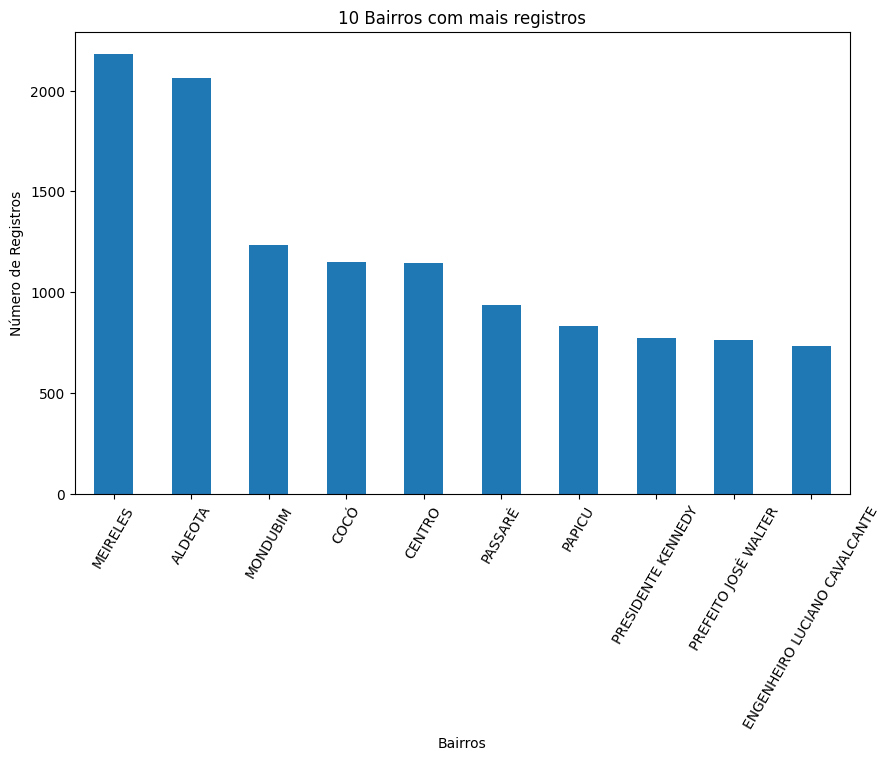

In [1693]:
top_appearence = df["BAIRRO"].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_appearence.plot(kind='bar')

plt.title("10 Bairros com mais registros")
plt.xlabel("Bairros")
plt.ylabel("Número de Registros")
plt.xticks(rotation=60)
plt.show()

B. Valores de imóveis

In [1694]:
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)

5. Qual é o valor médio(VL_BASE_CALCULO, VL_VENAL) de imóveis por bairro?

In [1695]:
media = df.groupby("BAIRRO")[["VL_BASE_CALCULO", "VL_VENAL"]].mean().reset_index()
media.head(10)

,BAIRRO,VL_BASE_CALCULO,VL_VENAL
0,AEROLÂNDIA,336854.063750,102519.498485
1,AEROPORTO,251264.000000,77500.856250
2,ALDEOTA,724989.769989,281059.380747
3,ALTO DA BALANÇA,315806.410588,102962.865278
4,AMADEU FURTADO,452809.816000,170933.410175
5,ANCURI,356896.352000,67213.763333
6,ANTÔNIO BEZERRA,290617.985341,32272.722051
7,ARACAPÉ,415417.500000,82670.896818
8,AUTRAN NUNES,521506.250000,114083.016250
9,BARRA DO CEARÁ,278257.248021,113739.897980


In [1696]:
# salvar em um csv, alterando o separador para que o google planilhas consiga abrir e ler corretamente os valores
media.to_csv("media_valores_por_bairro.csv", sep=",", decimal=",", index=False)

6. Qual a distribuição dos valores de transação? Existem outliers?

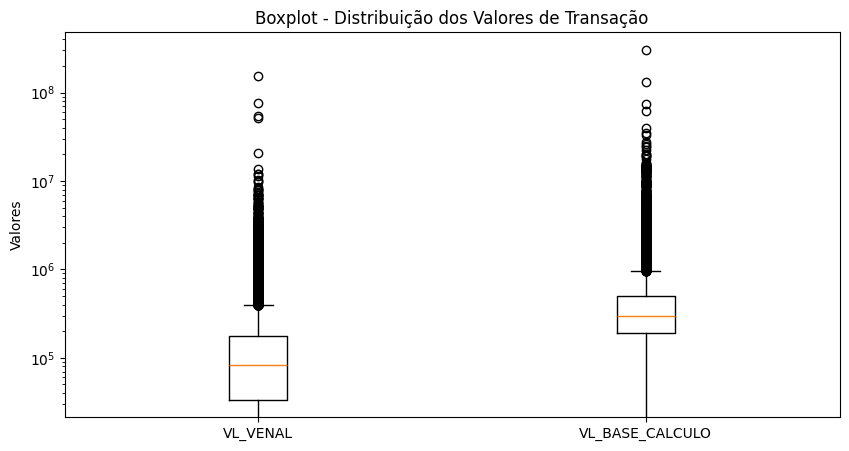

In [1697]:
plt.figure(figsize=(10,5))

plt.boxplot([df["VL_VENAL"].dropna(), df["VL_BASE_CALCULO"].dropna()], # utilizei o dropna() para evitar problemas com valores NaN na hora de plotar o boxplot
            labels=["VL_VENAL", "VL_BASE_CALCULO"], showfliers=True)

plt.title("Boxplot - Distribuição dos Valores de Transação")
plt.ylabel("Valores")
plt.yscale("log")  
plt.show()


7. Compare graficamente os valores venal x base de cálculo. Existem discrepâncias?

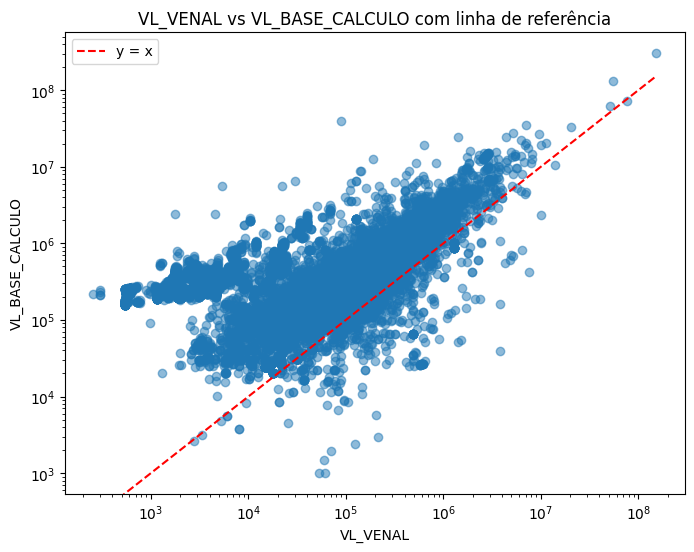

In [1698]:
plt.figure(figsize=(8,6))
plt.scatter(df["VL_VENAL"], df["VL_BASE_CALCULO"], alpha=0.5)
plt.plot([df["VL_VENAL"].min(), df["VL_VENAL"].max()],
         [df["VL_VENAL"].min(), df["VL_VENAL"].max()],
         color="red", linestyle="--", label="y = x")

plt.xlabel("VL_VENAL")
plt.ylabel("VL_BASE_CALCULO")
plt.title("VL_VENAL vs VL_BASE_CALCULO com linha de referência")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()

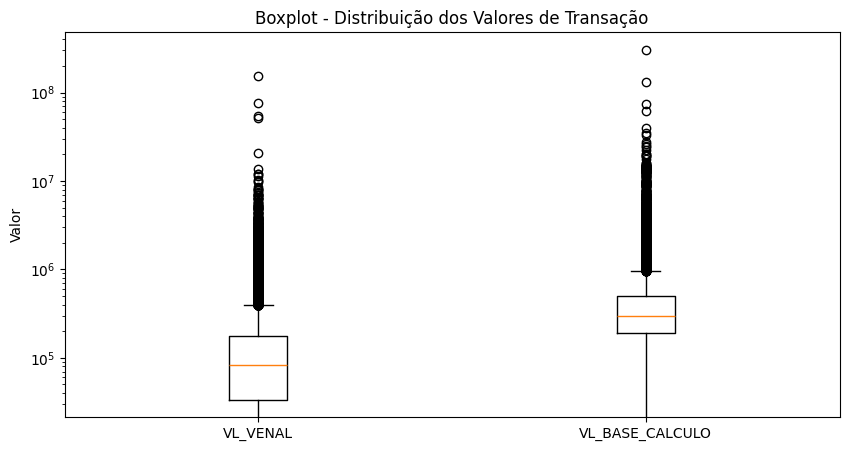

C. Tipologia dos imóveis

8. Quantos tipos de uso de imóvel existem? Qual o mais comum?

In [1699]:
df["TIPO_USO_IMOVEL"].nunique()

14

In [1700]:
df["TIPO_USO_IMOVEL"].value_counts()

TIPO_USO_IMOVEL
Residencial      22631
Comercial         4513
Sem               2642
Prestação          200
Hotelaria           45
Saúde               16
Religioso           15
Instrução           14
Fechado              8
Institucional        6
Industrial           5
Do lazer             3
Transporte           2
Desportivo           1
Name: count, dtype: int64

9. Há relação entre TIPO_USO_IMOVEL e o valor médio de transação?

In [1701]:
media_per_type_vl_venal = df.groupby("TIPO_USO_IMOVEL")["VL_VENAL"].mean().reset_index()

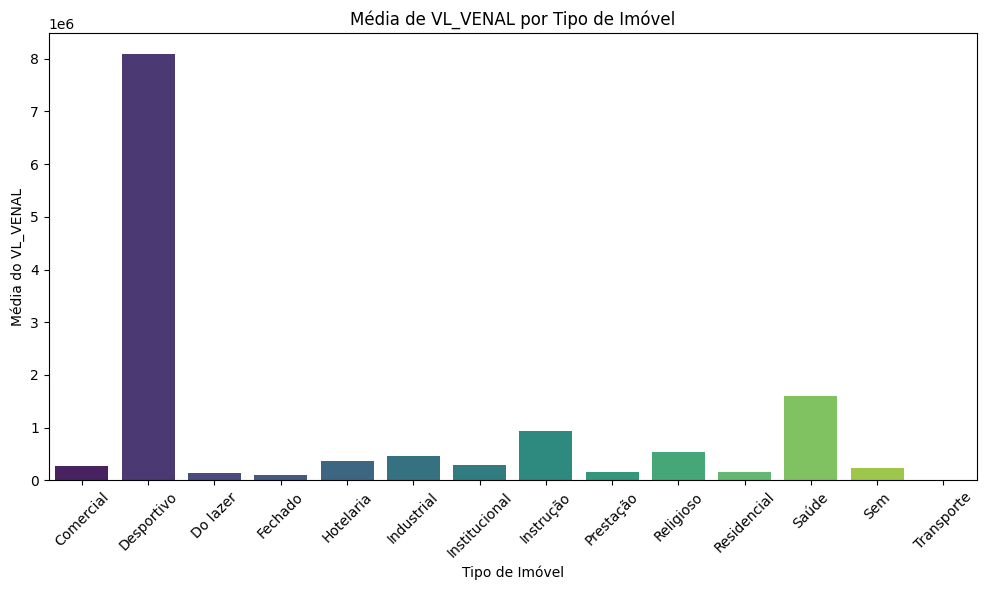

In [1702]:
plt.figure(figsize=(10,6))
sns.barplot(data=media_per_type_vl_venal, x="TIPO_USO_IMOVEL", y="VL_VENAL", palette="viridis")

plt.title("Média de VL_VENAL por Tipo de Imóvel")
plt.xlabel("Tipo de Imóvel")
plt.ylabel("Média do VL_VENAL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1703]:
media_per_type_vl_base_calculo = df.groupby("TIPO_USO_IMOVEL")["VL_BASE_CALCULO"].mean().reset_index()

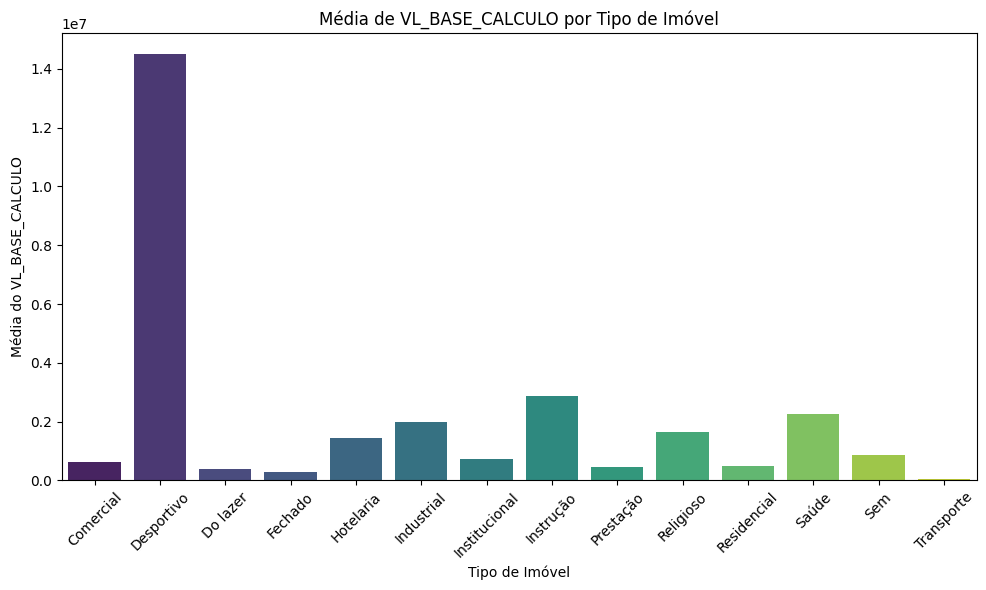

In [1704]:
plt.figure(figsize=(10,6))
sns.barplot(data=media_per_type_vl_base_calculo, x="TIPO_USO_IMOVEL", y="VL_BASE_CALCULO", palette="viridis")

plt.title("Média de VL_BASE_CALCULO por Tipo de Imóvel")
plt.xlabel("Tipo de Imóvel")
plt.ylabel("Média do VL_BASE_CALCULO")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1705]:
df[df["TIPO_USO_IMOVEL"] == "Desportivo"].head()

,VERSAO,ID_AVALIACAO,INSCRICAO_IMOVEL,NUM_DTI,EXERCICIO,DATA_CADASTRAMENTO_GI_IMOVEL,TIPO_TRANSMITENTE,TIPO_ADQUIRENTE,NUMERO_CEP,BAIRRO,LOGRADOURO,NUMERO,XSIRGAS2000,YSIRGAS2000,QTD_FRENTES,FRACAO_IDEAL,AREA_TERRENO,AREA_EDIFICADA,DATA_CONSTRUCAO,NUMERO_PAVIMENTOS,TIPO_USO_IMOVEL,PADRAO_CONSTRUCAO,TIPO_TERRENO,ANO_MES_DEBITO,NOME_ZONEAMENTO,ZONA_CARTORIO,DATA_DA_TRANSACAO_ITBI,ID_IMOVEL,CARTOGRAFIA,VL_BASE_CALCULO,VL_VENAL,VL_LANCAMENTO_IPTU,IND_COMPRA_VIA_PROGRAMA_HABITACIONAL
26188,1,1140267.0,89317,26077/2024,2024,2024-11-28 09:34:39,Juridica,Juridica,60182322.0,PRAIA DO FUTURO II,AV CLOVIS ARRAIS MAIA,6450.0,561876.397931,9.584242e+06,4,1.0,10000.0,1920.78,1994-10-31,2.0,Desportivo,Luxo 1,NaN,2024/DEZEMBRO,ZONA DA ORLA - TRECHO 7,5ª Zona,NaT,1753711,54-97-400,14500000.0,8085293.86,157954.74,Nenhum


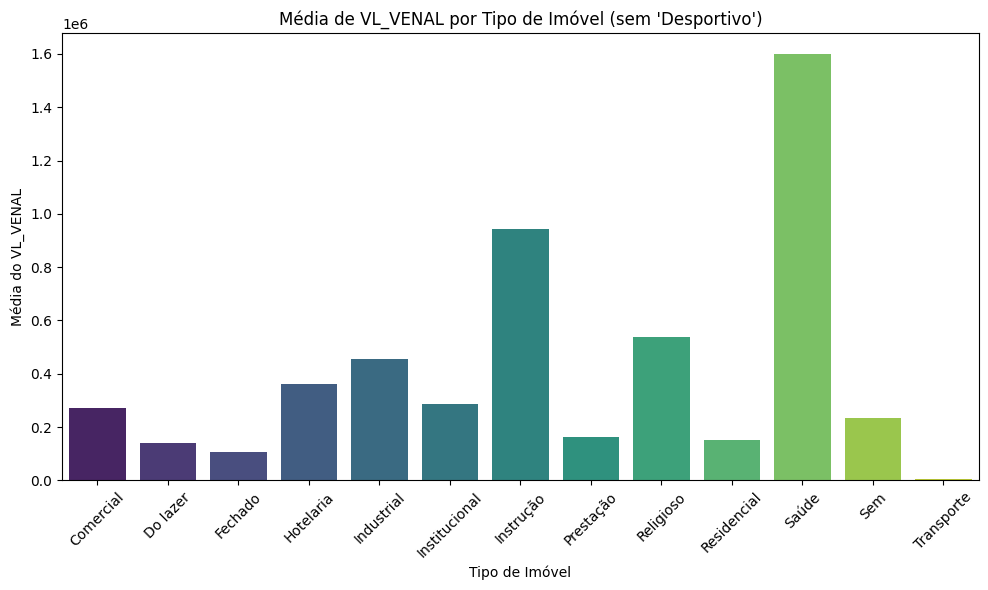

In [1706]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=media_per_type_vl_venal[media_per_type_vl_venal["TIPO_USO_IMOVEL"] != "Desportivo"],
    x="TIPO_USO_IMOVEL",
    y="VL_VENAL",
    palette="viridis"
)

plt.title("Média de VL_VENAL por Tipo de Imóvel (sem 'Desportivo')")
plt.xlabel("Tipo de Imóvel")
plt.ylabel("Média do VL_VENAL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


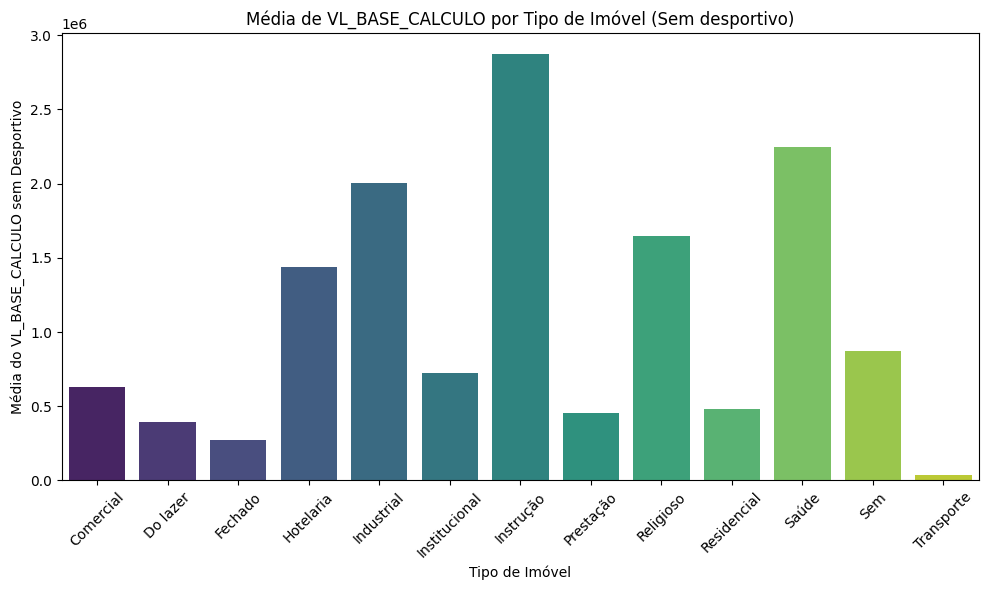

In [1707]:
plt.figure(figsize=(10,6))
sns.barplot(data=media_per_type_vl_base_calculo[media_per_type_vl_base_calculo["TIPO_USO_IMOVEL"] != "Desportivo"], x="TIPO_USO_IMOVEL", y="VL_BASE_CALCULO", palette="viridis")

plt.title("Média de VL_BASE_CALCULO por Tipo de Imóvel (Sem desportivo)")
plt.xlabel("Tipo de Imóvel")
plt.ylabel("Média do VL_BASE_CALCULO sem Desportivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1708]:
median_per_type_vl_base_calculo = df.groupby("TIPO_USO_IMOVEL")["VL_BASE_CALCULO"].median().reset_index()

In [1709]:
median_per_type_vl_venal = df.groupby("TIPO_USO_IMOVEL")["VL_VENAL"].median().reset_index()

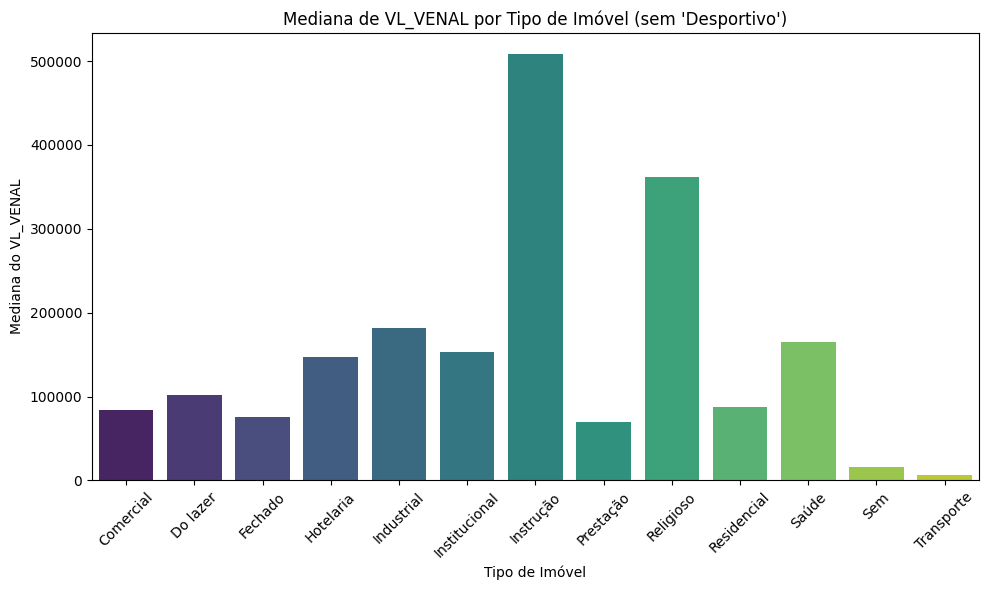

In [1710]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=median_per_type_vl_venal[median_per_type_vl_venal["TIPO_USO_IMOVEL"] != "Desportivo"],
    x="TIPO_USO_IMOVEL",
    y="VL_VENAL",
    palette="viridis"
)

plt.title("Mediana de VL_VENAL por Tipo de Imóvel (sem 'Desportivo')")
plt.xlabel("Tipo de Imóvel")
plt.ylabel("Mediana do VL_VENAL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


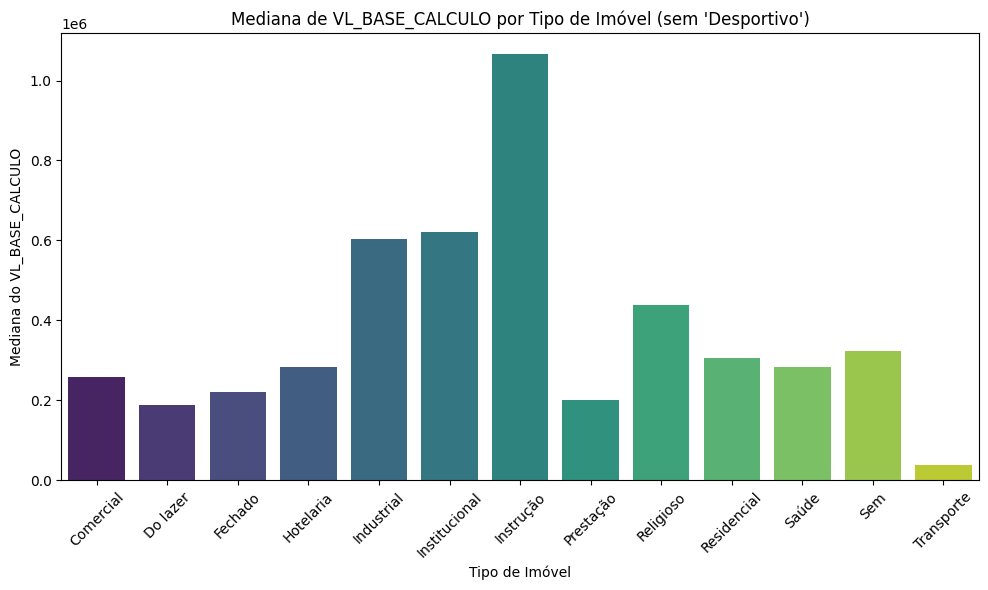

In [1711]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=median_per_type_vl_base_calculo[median_per_type_vl_base_calculo["TIPO_USO_IMOVEL"] != "Desportivo"],
    x="TIPO_USO_IMOVEL",
    y="VL_BASE_CALCULO",
    palette="viridis"
)

plt.title("Mediana de VL_BASE_CALCULO por Tipo de Imóvel (sem 'Desportivo')")
plt.xlabel("Tipo de Imóvel")
plt.ylabel("Mediana do VL_BASE_CALCULO")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


10. Existe relação entre o ano de construção (DATA_CONSTRUCAO) e os valores de
venda?

In [1712]:
df["ANO_CONSTRUCAO"] = df["DATA_CONSTRUCAO"].dt.year

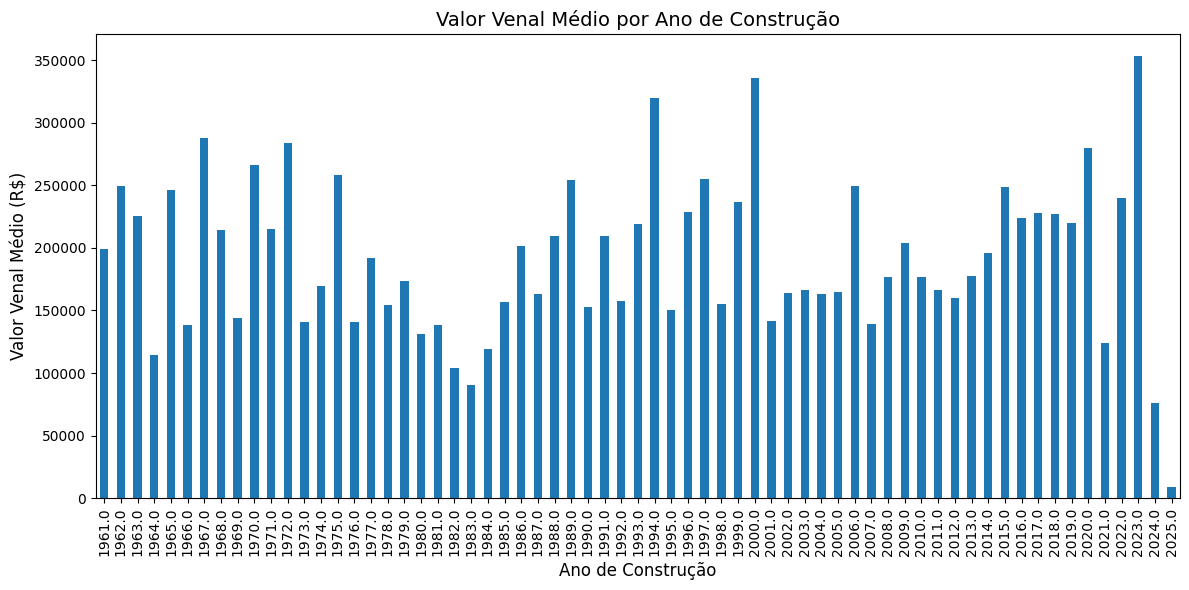

In [1713]:
df_grouped = df.groupby("ANO_CONSTRUCAO")["VL_VENAL"].mean().dropna()

plt.figure(figsize=(12,6))
df_grouped.plot(kind="bar")

plt.title("Valor Venal Médio por Ano de Construção", fontsize=14)
plt.xlabel("Ano de Construção", fontsize=12)
plt.ylabel("Valor Venal Médio (R$)", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

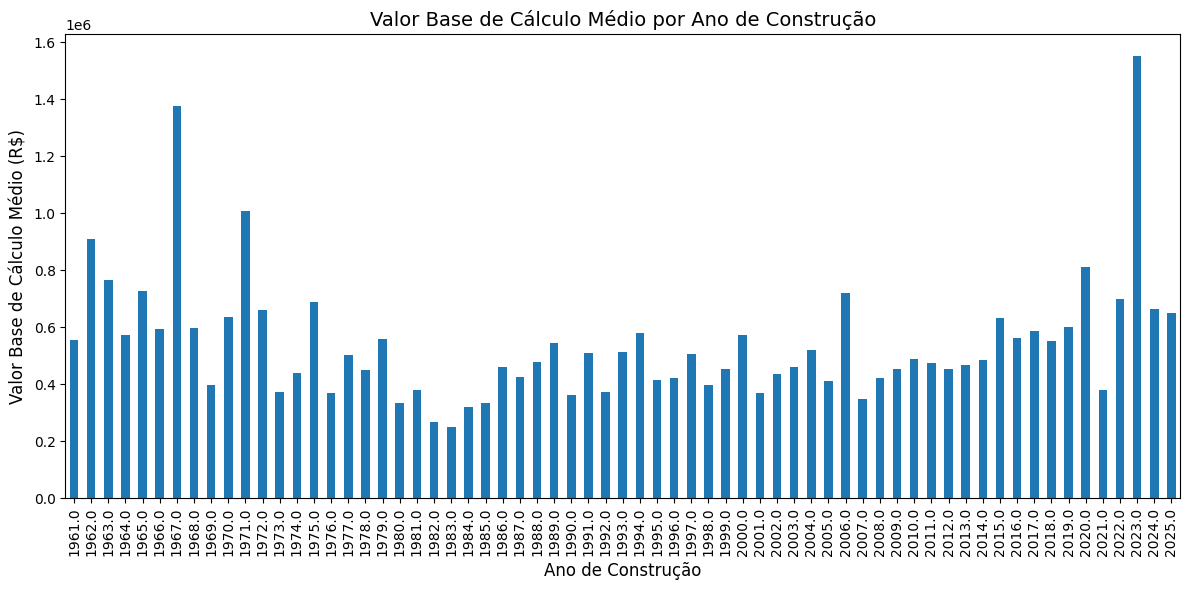

In [1714]:
df_grouped = df.groupby("ANO_CONSTRUCAO")["VL_BASE_CALCULO"].mean().dropna()

plt.figure(figsize=(12,6))
df_grouped.plot(kind="bar")

plt.title("Valor Base de Cálculo Médio por Ano de Construção", fontsize=14)
plt.xlabel("Ano de Construção", fontsize=12)
plt.ylabel("Valor Base de Cálculo Médio (R$)", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

11. Qual é a fração ideal média dos imóveis transacionados?

In [1715]:
df["FRACAO_IDEAL"].mean()

np.float64(0.23981479942227835)

D. Temporalidade

12. Como se distribuem as transações ao longo do tempo (mensalmente)?

In [1716]:
df["MES_DA_TRANSACAO_ITBI"] = df["DATA_DA_TRANSACAO_ITBI"].dt.month

In [1717]:
mensal = df.groupby("MES_DA_TRANSACAO_ITBI")[["VL_VENAL", "VL_BASE_CALCULO"]].sum().reset_index()

13. Há variação de valor médio dos imóveis ao longo dos meses?

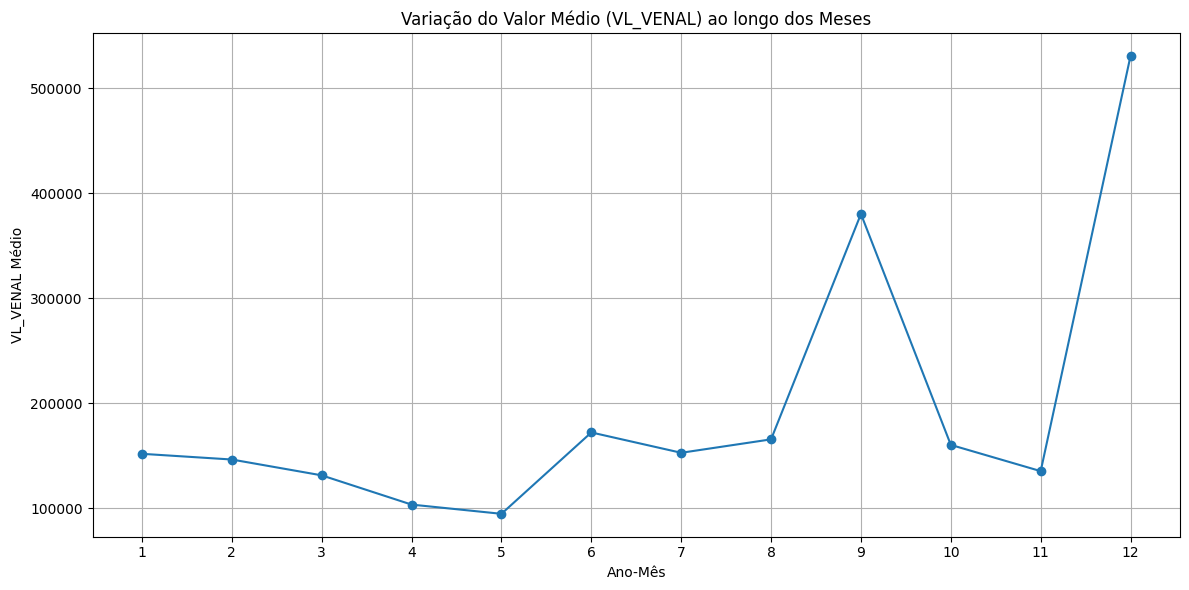

In [1718]:
media_mensal = df.groupby("MES_DA_TRANSACAO_ITBI")["VL_VENAL"].mean()

plt.figure(figsize=(12,6))
plt.plot(media_mensal.index, media_mensal.values, marker="o")

plt.title("Variação do Valor Médio (VL_VENAL) ao longo dos Meses")
plt.xlabel("Ano-Mês")
plt.ylabel("VL_VENAL Médio")
plt.xticks(media_mensal.index)
plt.grid(True)
plt.tight_layout()
plt.show()

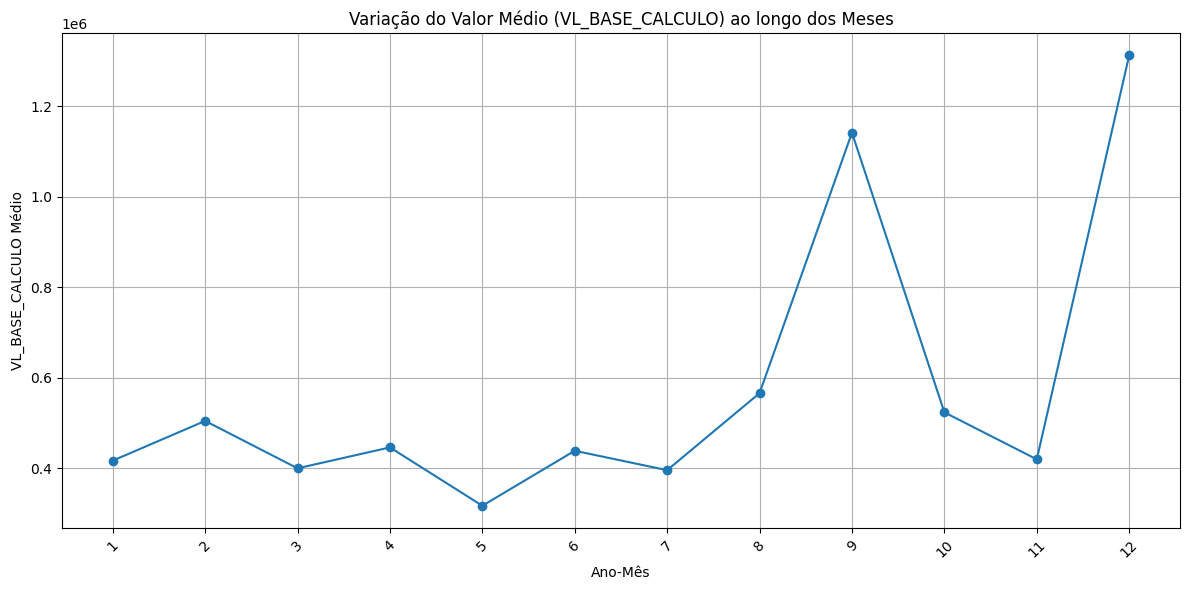

In [1719]:
media_mensal = df.groupby("MES_DA_TRANSACAO_ITBI")["VL_BASE_CALCULO"].mean()

plt.figure(figsize=(12,6))
plt.plot(media_mensal.index, media_mensal.values, marker="o")

plt.title("Variação do Valor Médio (VL_BASE_CALCULO) ao longo dos Meses")
plt.xlabel("Ano-Mês")
plt.ylabel("VL_BASE_CALCULO Médio")
plt.xticks(media_mensal.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


14. Existe sazonalidade? Algum mês tem mais transações?

Resposta: Mês de dezembro tem mais transações.

In [1720]:
df["MES_DA_TRANSACAO_ITBI"].value_counts()

MES_DA_TRANSACAO_ITBI
12.0    431
11.0    388
3.0     342
2.0     318
5.0     309
1.0     304
10.0    273
6.0     262
4.0     234
8.0     219
9.0     212
7.0     179
Name: count, dtype: int64

### Parte 3 - Predição com Aprendizado de Máquina

1. Crie uma variável-alvo VL_BASE_CALCULO (ou VL_VENAL) para prever o valor de transação de um imóvel.

In [1721]:
y = df["VL_BASE_CALCULO"]

2. Selecione variáveis relevantes: localização (bairro ou coordenadas), uso do imóvel, área 
do terreno, área construída, padrão de construção etc. 

In [1722]:
features_for_x = ["BAIRRO", "XSIRGAS2000", "YSIRGAS2000", "QTD_FRENTES", 
    "FRACAO_IDEAL", "AREA_TERRENO", "AREA_EDIFICADA", 
    "NUMERO_PAVIMENTOS", "TIPO_USO_IMOVEL", "PADRAO_CONSTRUCAO",
    "IND_COMPRA_VIA_PROGRAMA_HABITACIONAL"]

In [1723]:
X = df[features_for_x]

3. Separe treino/teste, normalize os dados e treine um modelo de regressão.

In [1724]:
mask = ~y.isnull()
X_clean = X[mask]
y_clean = y[mask]

features_to_use = [
    "BAIRRO", "XSIRGAS2000", "YSIRGAS2000", "QTD_FRENTES", 
    "FRACAO_IDEAL", "AREA_TERRENO", "AREA_EDIFICADA", 
    "NUMERO_PAVIMENTOS", "TIPO_USO_IMOVEL", "PADRAO_CONSTRUCAO",
    "IND_COMPRA_VIA_PROGRAMA_HABITACIONAL"
]

X_selected = X_clean[features_to_use]

mask_complete = ~X_selected.isnull().any(axis=1)
X_final = X_selected[mask_complete]
y_final = y_clean[mask_complete]

In [1725]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

categorical_features = ['BAIRRO', 'TIPO_USO_IMOVEL', 'PADRAO_CONSTRUCAO', 'IND_COMPRA_VIA_PROGRAMA_HABITACIONAL']
numerical_features = ['XSIRGAS2000', 'YSIRGAS2000', 'QTD_FRENTES', 'FRACAO_IDEAL', 'AREA_TERRENO', 'AREA_EDIFICADA', 'NUMERO_PAVIMENTOS']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 80/20 treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)


In [1726]:
# treino
pipeline.fit(X_train, y_train)

# predição
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Métricas:")
print(f"  - R² Score: {test_r2:.4f}")
print(f"  - RMSE: {test_rmse:.2f}")
print(f"  - MAE: {test_mae:.2f}")

Métricas:
  - R² Score: 0.5678
  - RMSE: 679486.65
  - MAE: 233134.52


In [1727]:
y = df["VL_VENAL"]

B. Classificação

6. Use a coluna IND_COMPRA_VIA_PROGRAMA_HABITACIONAL como alvo binário
(0/1).

In [1728]:
df['IND_COMPRA_VIA_PROGRAMA_HABITACIONAL'].value_counts()

IND_COMPRA_VIA_PROGRAMA_HABITACIONAL
Nenhum                             20005
Sistema Financeiro de Habitação     9656
Outros                               440
Name: count, dtype: int64

In [1729]:
df['IND_COMPRA_VIA_PROGRAMA_HABITACIONAL'].value_counts()

IND_COMPRA_VIA_PROGRAMA_HABITACIONAL
Nenhum                             20005
Sistema Financeiro de Habitação     9656
Outros                               440
Name: count, dtype: int64

In [1730]:
y = (df["IND_COMPRA_VIA_PROGRAMA_HABITACIONAL"] != "Nenhum").astype(int)

In [1731]:
y.value_counts()

IND_COMPRA_VIA_PROGRAMA_HABITACIONAL
0    20005
1    10096
Name: count, dtype: int64

7. Treine um classificador (Random Forest) para prever se uma transação foi via programa habitacional.

In [1732]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
features_for_x.append('VL_VENAL')
features_for_x.append('VL_BASE_CALCULO')
X_classification = df[features_for_x].copy()
y_classification = y.copy()


mask_clean = ~X_classification.isnull().any(axis=1) & ~y_classification.isnull()
X_clean = X_classification[mask_clean]
y_clean = y_classification[mask_clean]

In [1733]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

numerical_features.append('VL_VENAL')
numerical_features.append('VL_BASE_CALCULO')
categorical_features.remove('IND_COMPRA_VIA_PROGRAMA_HABITACIONAL')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop='first', handle_unknown="ignore"), categorical_features)
    ]
)

all_features = list(numerical_features) + list(categorical_features)


# modelo RandomForest

clf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
])


# treino
clf_pipeline.fit(X_train, y_train)

# predição
y_train_pred = clf_pipeline.predict(X_train)
y_test_pred = clf_pipeline.predict(X_test)
y_test_proba = clf_pipeline.predict_proba(X_test)[:, 1]

8. Avalie com accuracy, precision, recall e confusion matrix.

  - Accuracy:  0.7664
  - Precision: 0.6224
  - Recall:    0.5203
  - F1-Score:  0.5668


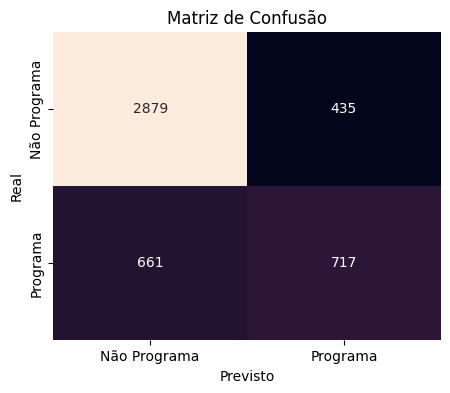

In [1734]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"  - Accuracy:  {test_accuracy:.4f}")
print(f"  - Precision: {test_precision:.4f}")
print(f"  - Recall:    {test_recall:.4f}")
print(f"  - F1-Score:  {test_f1:.4f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cbar=False,
            xticklabels=["Não Programa", "Programa"],
            yticklabels=["Não Programa", "Programa"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

9. Existe viés geográfico ou de tipo de imóvel nos casos de programa habitacional?

In [1735]:
df["IND_COMPRA_VIA_PROGRAMA_HABITACIONAL"] = (df["IND_COMPRA_VIA_PROGRAMA_HABITACIONAL"] != "Nenhum").astype(int)

In [ ]:
prop_bairro = df.groupby("BAIRRO")["IND_COMPRA_VIA_PROGRAMA_HABITACIONAL"].mean().sort_values(ascending=False)
print(prop_bairro.head(10))

BAIRRO
GUAJERU                 0.871622
ANTÔNIO BEZERRA         0.813187
BARROSO                 0.778393
PARREÃO                 0.754579
COUTO FERNANDES         0.661290
PRAIA DO FUTURO II      0.658333
PAUPINA                 0.654917
CARLITO PAMPLONA        0.654886
PRESIDENTE KENNEDY      0.647211
PREFEITO JOSÉ WALTER    0.591088
Name: IND_COMPRA_VIA_PROGRAMA_HABITACIONAL, dtype: float64


In [1737]:
prop_tipo = df.groupby("TIPO_USO_IMOVEL")["IND_COMPRA_VIA_PROGRAMA_HABITACIONAL"].mean().sort_values(ascending=False)
print(prop_tipo)


TIPO_USO_IMOVEL
Residencial      0.409836
Sem              0.271385
Institucional    0.166667
Prestação        0.045000
Hotelaria        0.044444
Comercial        0.020386
Industrial       0.000000
Fechado          0.000000
Do lazer         0.000000
Desportivo       0.000000
Religioso        0.000000
Instrução        0.000000
Saúde            0.000000
Transporte       0.000000
Name: IND_COMPRA_VIA_PROGRAMA_HABITACIONAL, dtype: float64
